In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
import seaborn as sns

In [526]:
df = pd.read_csv("Egypt_Houses_Price.csv")
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [527]:
df.shape

(27361, 12)

In [528]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [529]:
df = df.dropna()

In [530]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

## <font color ='purple'>coerce -> convert non numerical to NAN <font>

In [532]:
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [533]:
df.shape

(26730, 12)

In [534]:
df.isnull().sum()

Type               0
Price             37
Bedrooms          37
Bathrooms         37
Area              36
Furnished          0
Level              0
Compound           0
Payment_Option     0
Delivery_Date      0
Delivery_Term      0
City               0
dtype: int64

In [535]:
df.dropna(inplace=True)
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [536]:
df['Bedrooms'] = df.Bedrooms.astype(int)
df['Bathrooms'] = df.Bedrooms.astype(int)

# <font color='purple'>To know if they are correlated to our target</font>

In [538]:
exclude_col = 'Price'
for i in df.columns:
    if i == exclude_col:
        continue
    else:
        corr_value = df[i].astype('category').cat.codes.corr(df['Price'])
        print(i + ':' + str(corr_value *100))

Type:36.2545756462494
Bedrooms:49.626952040637875
Bathrooms:49.626952040637875
Area:65.02772794276609
Furnished:2.3290881853514223
Level:37.844884441455925
Compound:-11.513106540309364
Payment_Option:-12.035586459806561
Delivery_Date:-1.2676227344820106
Delivery_Term:-2.052255708553188
City:11.468417839792046


In [539]:
df.drop(['Delivery_Date','Delivery_Term','Compound'],axis=1,inplace=True)
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
0,Duplex,4000000.0,3,3,400.0,No,7,Cash,Nasr City
1,Apartment,4000000.0,3,3,160.0,No,10+,Cash,Camp Caesar
2,Apartment,2250000.0,3,3,165.0,No,1,Cash,Smoha
3,Apartment,1900000.0,3,3,230.0,No,10,Cash,Nasr City
4,Apartment,5800000.0,2,2,160.0,No,Ground,Cash,New Cairo - El Tagamoa


In [540]:
df.shape

(26692, 9)

In [541]:
df.City = df.City.apply(lambda x: x.strip())
location = df.groupby('City')['City'].agg('count').sort_values(ascending = False)
location

City
New Cairo - El Tagamoa    6523
North Coast               6327
Sheikh Zayed              2313
Ain Sukhna                1706
6th of October            1703
                          ... 
Quesna                       1
Aga                          1
Sadat                        1
Saft El Laban                1
Zohour District              1
Name: City, Length: 178, dtype: int64

In [542]:
len(location[location<=10])

105

In [543]:
location_less_10 = location[location<=10]
location_less_10

City
Al Ibrahimiyyah    10
Abu Talat          10
Bolkly             10
Stanley            10
Almazah            10
                   ..
Quesna              1
Aga                 1
Sadat               1
Saft El Laban       1
Zohour District     1
Name: City, Length: 105, dtype: int64

In [544]:
df[df['City']=="(View phone number)"].head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
17063,Standalone Villa,28000000.0,6,6,600.0,Unknown,Unknown,Cash,(View phone number)
17205,Chalet,1000000.0,2,2,57.0,Yes,2,Cash,(View phone number)
17209,Chalet,1330000.0,1,1,83.0,Unknown,Ground,Cash,(View phone number)
17444,Chalet,520000.0,1,1,60.0,No,1,Installment,(View phone number)
17662,Studio,520000.0,1,1,60.0,No,1,Cash or Installment,(View phone number)


In [545]:
df[df['City']=="(View phone number)"].shape

(50, 9)

In [546]:
df.drop(df[df['City']=="(View phone number)"].index,inplace=True)

In [547]:
df.City = df.City.apply(lambda x:'others' if x in location_less_10 else x)

In [548]:
len(df.City.unique())

73

In [549]:
df = df[df['Price'] != 'Unknown']
df.shape

(26642, 9)

In [550]:
df.Type.unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [551]:
df['Type'] = df['Type'].str.title()
df['Type'] = df['Type'].replace({
    'Standalone Villa': 'Standalone Villa',
    'Stand Alone Villa': 'Standalone Villa'
})
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin House', 'Town House'], dtype=object)

In [552]:
df['Type'].value_counts()

Type
Apartment           8498
Chalet              6580
Standalone Villa    4609
Town House          3055
Twin House          2266
Duplex               860
Penthouse            526
Studio               248
Name: count, dtype: int64

# <font color='rainbow'>Studio,Penthouse -> not common in Egypt<font>

In [554]:
df = df[~df['Type'].isin(['Penthouse', 'Studio'])]

In [555]:
df['Type'].value_counts()

Type
Apartment           8498
Chalet              6580
Standalone Villa    4609
Town House          3055
Twin House          2266
Duplex               860
Name: count, dtype: int64

In [556]:
df['Level'].value_counts()

Level
Unknown    9717
Ground     4710
2          3549
1          3493
3          1928
4           807
5           539
10+         251
6           220
7           214
8           128
Highest     111
9           102
10           99
Name: count, dtype: int64

In [557]:
df.drop(df[(df['Level'] == '10+') | (df['Level'] == 'Highest')].index, inplace=True)

In [558]:
df['Level'].value_counts()

Level
Unknown    9717
Ground     4710
2          3549
1          3493
3          1928
4           807
5           539
6           220
7           214
8           128
9           102
10           99
Name: count, dtype: int64

In [559]:
type_level_counts = df.groupby(['Type', 'Level']).size().unstack(fill_value=0)
type_level_counts

Level,1,10,2,3,4,5,6,7,8,9,Ground,Unknown
Type,,,,,,,,,,,,
Apartment,1317,94,2139,1612,709,498,204,192,116,96,1283,0
Chalet,2063,2,1260,222,73,16,6,16,11,4,1949,866
Duplex,66,3,106,89,23,25,10,5,1,2,477,22
Standalone Villa,11,0,22,3,0,0,0,0,0,0,319,4253
Town House,26,0,10,2,1,0,0,1,0,0,384,2631
Twin House,10,0,12,0,1,0,0,0,0,0,298,1945


In [560]:
df.drop(df[(df['Level'] == 'Unknown') & (df['Type'].isin(['Chalet', 'Duplex']))].index, inplace=True)

In [561]:
type_level_counts = df.groupby(['Type', 'Level']).size().unstack(fill_value=0)
type_level_counts

Level,1,10,2,3,4,5,6,7,8,9,Ground,Unknown
Type,,,,,,,,,,,,
Apartment,1317,94,2139,1612,709,498,204,192,116,96,1283,0
Chalet,2063,2,1260,222,73,16,6,16,11,4,1949,0
Duplex,66,3,106,89,23,25,10,5,1,2,477,0
Standalone Villa,11,0,22,3,0,0,0,0,0,0,319,4253
Town House,26,0,10,2,1,0,0,1,0,0,384,2631
Twin House,10,0,12,0,1,0,0,0,0,0,298,1945


In [562]:
typesupdate = ['Town House', 'Standalone Villa','Twin House']
df.loc[(df['Type'].isin(typesupdate)) & (df['Level'] == 'Unknown'), 'Level'] = '-1'

In [563]:
type_level_counts = df.groupby(['Type', 'Level']).size().unstack(fill_value=0)
type_level_counts

Level,-1,1,10,2,3,4,5,6,7,8,9,Ground
Type,,,,,,,,,,,,
Apartment,0,1317,94,2139,1612,709,498,204,192,116,96,1283
Chalet,0,2063,2,1260,222,73,16,6,16,11,4,1949
Duplex,0,66,3,106,89,23,25,10,5,1,2,477
Standalone Villa,4253,11,0,22,3,0,0,0,0,0,0,319
Town House,2631,26,0,10,2,1,0,0,1,0,0,384
Twin House,1945,10,0,12,0,1,0,0,0,0,0,298


In [564]:
df['Level'] = df['Level'].str.replace("Ground",'0')

In [565]:
df['Level'].unique()

array(['7', '1', '10', '0', '3', '2', '9', '4', '5', '8', '6', '-1'],
      dtype=object)

In [566]:
df['Level'] = df['Level'].astype(int)

In [567]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
0,Duplex,4000000.0,3,3,400.0,No,7,Cash,Nasr City
2,Apartment,2250000.0,3,3,165.0,No,1,Cash,Smoha
3,Apartment,1900000.0,3,3,230.0,No,10,Cash,Nasr City
4,Apartment,5800000.0,2,2,160.0,No,0,Cash,New Cairo - El Tagamoa
5,Apartment,1844900.0,4,4,222.0,No,1,Cash or Installment,New Cairo - El Tagamoa


In [568]:
df['Furnished'] = df['Furnished'].str.replace('Unknown','No')

In [569]:
paymentupdate = ['Apartment', 'Chalet', 'Town House','Duplex']
df.loc[(df['Type'].isin(paymentupdate)) & (df['Payment_Option'] == 'Unknown Payment'), 'Payment_Option'] = 'Cash or Installment'

In [570]:
paymentupdate2 = ['Standalone Villa', 'Twin House']
df.loc[(df['Type'].isin(paymentupdate2)) & (df['Payment_Option'] == 'Unknown Payment'), 'Payment_Option'] = 'Cash'

In [571]:
type_level_counts = df.groupby(['Type', 'Payment_Option']).size().unstack(fill_value=0)
type_level_counts

Payment_Option,Cash,Cash or Installment,Installment
Type,,,
Apartment,3364,3716,1180
Chalet,1123,3595,904
Duplex,291,409,107
Standalone Villa,2779,1372,457
Town House,630,1827,598
Twin House,1233,691,342


In [572]:
for col in df.drop(['Area','Price','Bedrooms','Bathrooms'],axis='columns').columns:
    print(f'{col} : {df[col].unique()}')

Type : ['Duplex' 'Apartment' 'Chalet' 'Standalone Villa' 'Twin House'
 'Town House']
Furnished : ['No' 'Yes']
Level : [ 7  1 10  0  3  2  9  4  5  8  6 -1]
Payment_Option : ['Cash' 'Cash or Installment' 'Installment']
City : ['Nasr City' 'Smoha' 'New Cairo - El Tagamoa' 'Sheikh Zayed'
 'Shorouk City' 'Gesr Al Suez' 'New Capital City' 'New Damietta'
 'Zahraa Al Maadi' '6th of October' 'Mansura' 'New Heliopolis' 'others'
 'Badr City' 'Borg al-Arab' 'Mohandessin' 'Glim' 'Ain Sukhna' 'Maadi'
 'Hadayek 6th of October' 'Madinaty' 'Haram' 'Ismailia City'
 '10th of Ramadan' 'Heliopolis' 'Rehab City' 'Hadayek al-Ahram'
 'North Coast' 'Sidi Beshr' 'Nakheel' 'Obour City' 'Hurghada' 'Tanta'
 'Helmeyat El Zaytoun' 'Mokattam' 'Katameya' 'Alamein' 'Miami'
 'Hadayek al-Kobba' 'Mostakbal City' 'Agami' 'Ras al-Bar' 'Mandara'
 '15 May City' 'Maamoura' 'Seyouf' 'Sharq District' 'Laurent'
 'New Mansoura' 'Dokki' 'Sheraton' 'Faisal' 'Roushdy' 'Zagazig'
 'San Stefano' 'Moharam Bik' 'West Somid' 'Asafra' 'Gou

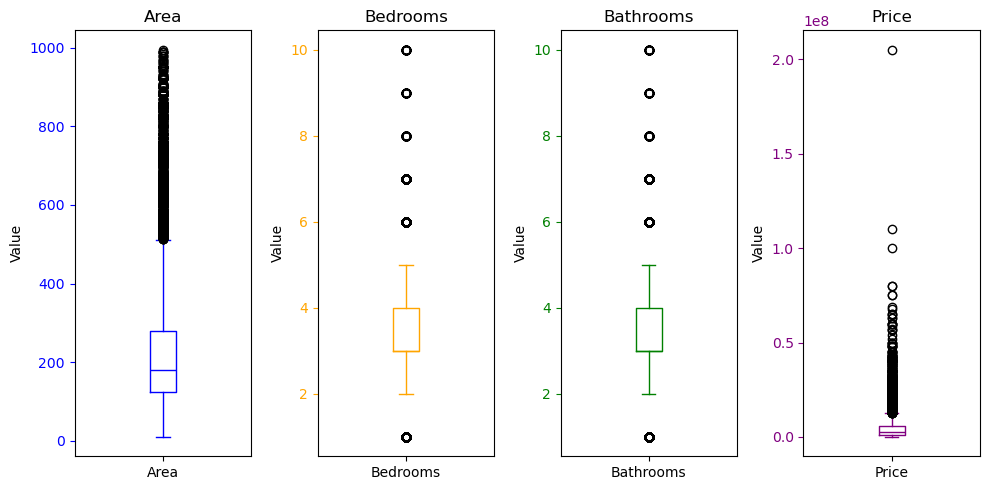

In [573]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

df['Area'].plot(kind='box', ax=ax[0], color='blue')
ax[0].set_title('Area')
ax[0].set_ylabel('Value')
ax[0].tick_params(axis='y', colors='blue')

df['Bedrooms'].plot(kind='box', ax=ax[1], color='orange')
ax[1].set_title('Bedrooms')
ax[1].set_ylabel('Value')
ax[1].tick_params(axis='y', colors='orange')

df['Bathrooms'].plot(kind='box', ax=ax[2], color='green')
ax[2].set_title('Bathrooms')
ax[2].set_ylabel('Value')
ax[2].tick_params(axis='y', colors='green')

df['Price'].plot(kind='box', ax=ax[3], color='purple')
ax[3].set_title('Price')
ax[3].set_ylabel('Value')
ax[3].tick_params(axis='y', colors='purple')

plt.tight_layout()

plt.show()

In [574]:
df[df.Area/df.Bedrooms<7].head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
2280,Apartment,3200000.0,4,4,20.0,No,4,Cash or Installment,New Capital City
6990,Apartment,1128000.0,3,3,14.0,No,3,Installment,New Cairo - El Tagamoa
7345,Apartment,1500000.0,3,3,10.0,No,4,Cash or Installment,New Cairo - El Tagamoa
15977,Chalet,3000000.0,2,2,12.0,No,0,Cash,North Coast
24905,Standalone Villa,29000000.0,5,5,11.0,No,-1,Cash,New Cairo - El Tagamoa


In [575]:
df.drop(df[df.Area/df.Bedrooms<7].index,inplace=True)

In [576]:
df[df['Bathrooms'] > df['Bedrooms']]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City


In [577]:
df['Bathrooms'].unique()

array([ 3,  2,  4,  1,  5,  7,  6,  8, 10,  9])

In [578]:
df.Price.describe().round(1)

count        24613.0
mean       4534665.3
std        5696051.8
min          30000.0
25%        1200000.0
50%        2731000.0
75%        5869000.0
max      205000000.0
Name: Price, dtype: float64

In [579]:
df = df[~((df['Price'] < 300000 ) | (df['Price'] >= 50000000))]

In [580]:
df['Price_per_Area'] = (df['Price']/df['Area']).round(2)
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Price_per_Area
0,Duplex,4000000.0,3,3,400.0,No,7,Cash,Nasr City,10000.00
2,Apartment,2250000.0,3,3,165.0,No,1,Cash,Smoha,13636.36
3,Apartment,1900000.0,3,3,230.0,No,10,Cash,Nasr City,8260.87
4,Apartment,5800000.0,2,2,160.0,No,0,Cash,New Cairo - El Tagamoa,36250.00
5,Apartment,1844900.0,4,4,222.0,No,1,Cash or Installment,New Cairo - El Tagamoa,8310.36


In [581]:
def remove_outlier(df,Price_per_Area):
    data = pd.DataFrame()
    for key,subdf in df.groupby('Type'):
        m = np.mean(subdf.Price_per_Area)
        s = np.std(subdf.Price_per_Area)
        outlier_data = subdf[(subdf.Price_per_Area>=(m-s))& (subdf.Price_per_Area<=(m+s))]
        data = pd.concat([data,outlier_data],ignore_index = True)
    return data
df = remove_outlier(df,'Price_per_Area')
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Price_per_Area
0,Apartment,2250000.0,3,3,165.0,No,1,Cash,Smoha,13636.36
1,Apartment,1900000.0,3,3,230.0,No,10,Cash,Nasr City,8260.87
2,Apartment,1844900.0,4,4,222.0,No,1,Cash or Installment,New Cairo - El Tagamoa,8310.36
3,Apartment,1650000.0,2,2,144.0,No,1,Cash or Installment,Sheikh Zayed,11458.33
4,Apartment,1560000.0,3,3,200.0,No,0,Cash or Installment,New Cairo - El Tagamoa,7800.00


In [582]:
from scipy.stats import zscore


def removed_outliers(df):
    cleaned_data = pd.DataFrame()
    
    for property_type, group in df.groupby('Type'):
        group['Bedrooms_z'] = zscore(group['Bedrooms'])
        group['Bathrooms_z'] = zscore(group['Bathrooms'])
        group['Area_z'] = zscore(group['Area'])

        cleaned_group = group[(group['Bedrooms_z'].abs() <= 3) & 
                              (group['Bathrooms_z'].abs() <= 3) & 
                              (group['Area_z'].abs() <= 3)]
        
        cleaned_data = pd.concat([cleaned_data, cleaned_group], ignore_index=True)
    
    cleaned_data.drop(columns=['Bedrooms_z', 'Bathrooms_z', 'Area_z'], inplace=True)
    
    return cleaned_data
    
df = removed_outliers(df)

print(df.shape)


(16909, 10)


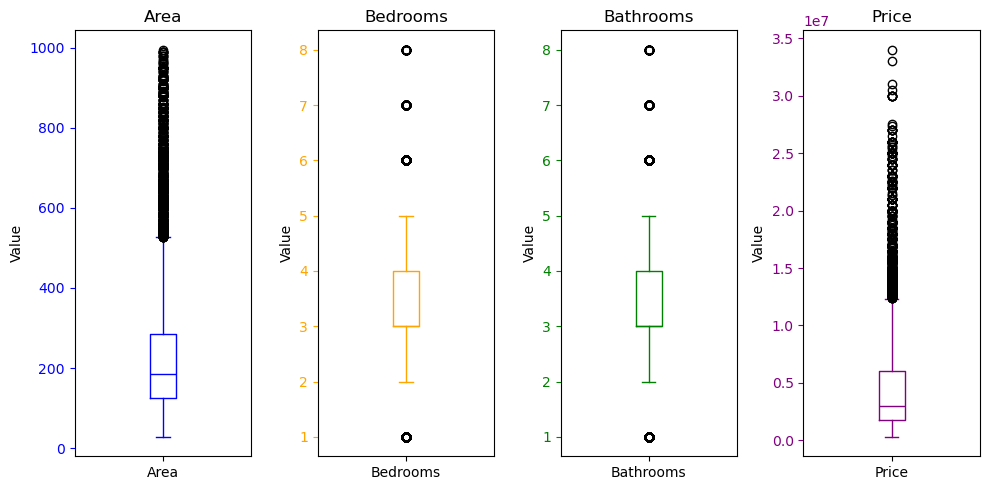

In [583]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

df['Area'].plot(kind='box', ax=ax[0], color='blue')
ax[0].set_title('Area')
ax[0].set_ylabel('Value')
ax[0].tick_params(axis='y', colors='blue')

df['Bedrooms'].plot(kind='box', ax=ax[1], color='orange')
ax[1].set_title('Bedrooms')
ax[1].set_ylabel('Value')
ax[1].tick_params(axis='y', colors='orange')

df['Bathrooms'].plot(kind='box', ax=ax[2], color='green')
ax[2].set_title('Bathrooms')
ax[2].set_ylabel('Value')
ax[2].tick_params(axis='y', colors='green')

df['Price'].plot(kind='box', ax=ax[3], color='purple')
ax[3].set_title('Price')
ax[3].set_ylabel('Value')
ax[3].tick_params(axis='y', colors='purple')

plt.tight_layout()

plt.show()

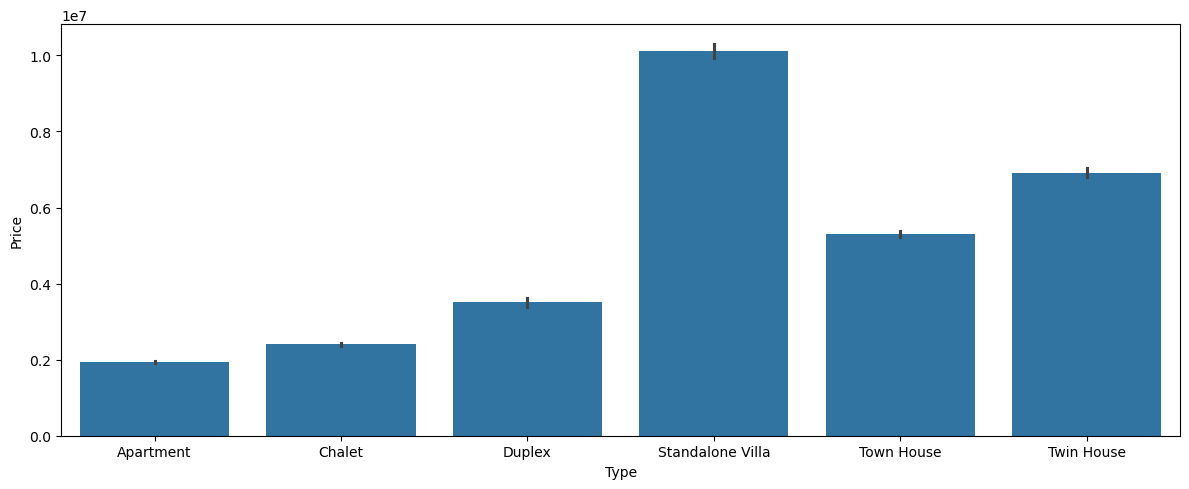

In [584]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Type', y='Price')
plt.tight_layout()
plt.show()

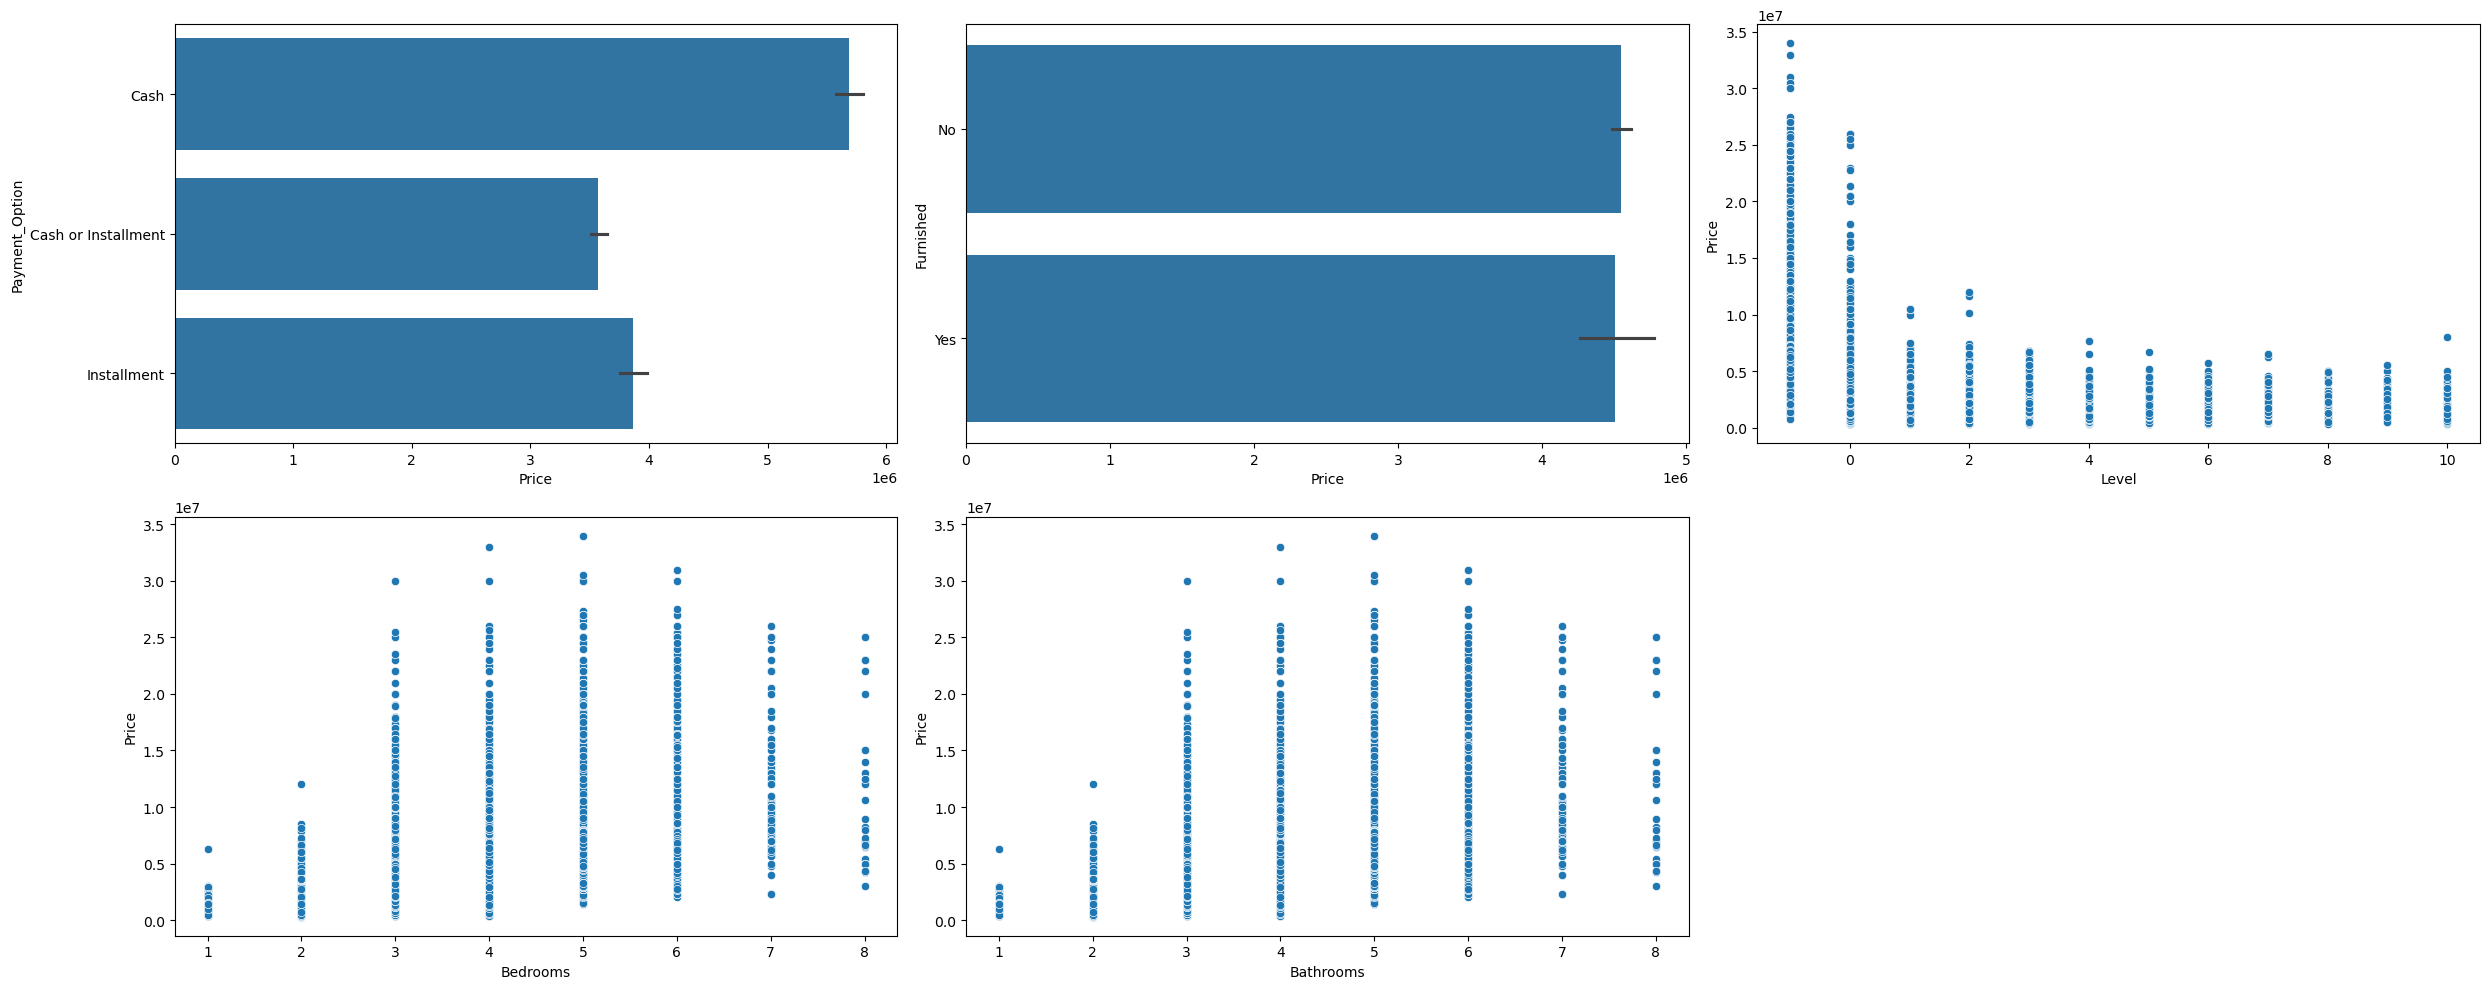

In [585]:
fig,axs = plt.subplots(2,3,figsize=(25,10))
sns.barplot(data=df, x='Price', y='Payment_Option',ax=axs[0,0])
sns.barplot(data=df, x='Price', y='Furnished',ax=axs[0,1])
sns.scatterplot(data=df,x='Level',y='Price',ax=axs[0,2])
sns.scatterplot(data=df,x='Bedrooms',y='Price',ax=axs[1,0])
sns.scatterplot(data=df,x='Bathrooms',y='Price',ax=axs[1,1])
axs[1,2].axis('off')
plt.tight_layout()
plt.show()

In [586]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [587]:
df['Furnished'] = df['Furnished'].replace({
    'No': 0,
    'Yes': 1
})
df['Furnished'].unique()

array([0, 1], dtype=int64)

In [588]:
df['Payment_Option'] = df['Payment_Option'].map({'Cash' : 0 , 'Installment' : 1,'Cash or Installment' : 2})
df['Payment_Option'].unique()

array([0, 2, 1], dtype=int64)

In [589]:
types = ['Apartment','Chalet','Duplex','Town House','Twin House','Standalone Villa']

In [590]:
oe = OrdinalEncoder(categories=[types])

In [591]:
oe.fit_transform(df[['Type']])

array([[0.],
       [0.],
       [0.],
       ...,
       [4.],
       [4.],
       [4.]])

In [592]:
df['Type'] = oe.fit_transform(df[['Type']])
df.Type.unique()

array([0., 1., 2., 5., 3., 4.])

In [593]:
from sklearn.preprocessing import LabelEncoder

In [594]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Price_per_Area
0,0.0,2250000.0,3,3,165.0,0,1,0,65,13636.36
1,0.0,1900000.0,3,3,230.0,0,10,0,42,8260.87
2,0.0,1844900.0,4,4,222.0,0,1,2,43,8310.36
3,0.0,1650000.0,2,2,144.0,0,1,2,60,11458.33
4,0.0,1560000.0,3,3,200.0,0,0,2,43,7800.00
...,...,...,...,...,...,...,...,...,...,...
16904,4.0,8600000.0,6,6,429.0,0,-1,1,44,20046.62
16905,4.0,6800000.0,4,4,450.0,1,-1,2,19,15111.11
16906,4.0,6400000.0,4,4,200.0,0,-1,2,49,32000.00
16907,4.0,6276000.0,3,3,200.0,0,-1,1,2,31380.00


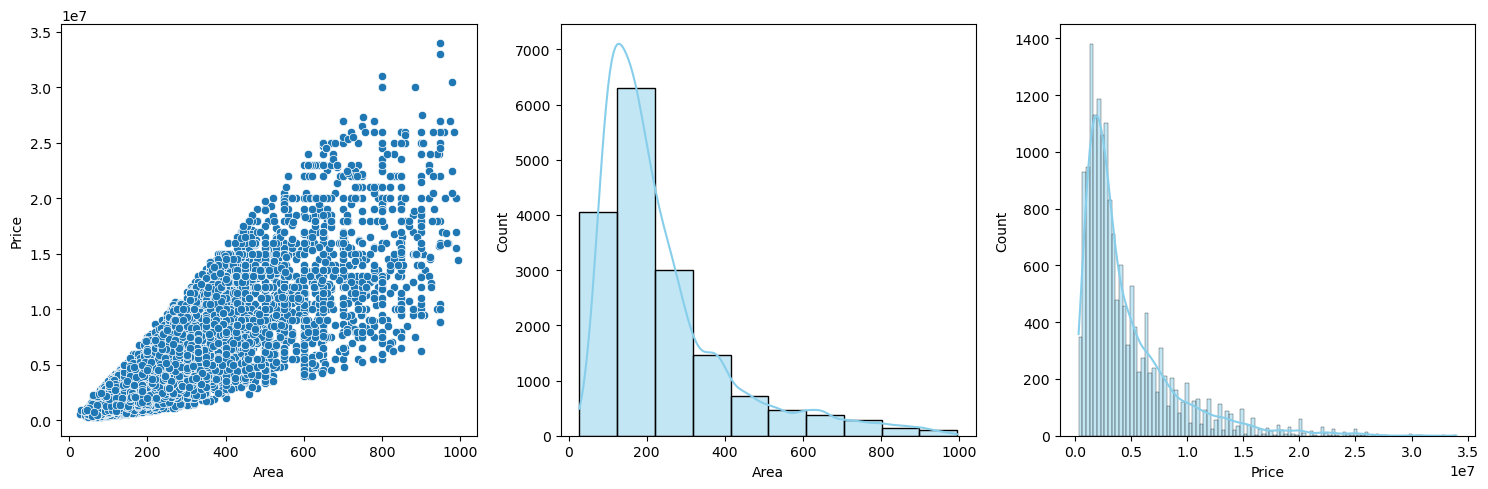

In [595]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='Area', y='Price',ax=axs[0])
sns.histplot(df['Area'], kde=True, color='skyblue', bins=10,ax=axs[1])
sns.histplot(df['Price'], kde=True, color='skyblue',ax=axs[2]) 
plt.tight_layout()
plt.show()

# <font color='red'> Log used to solve skewness data </font>

In [597]:
from scipy.stats import skew

In [598]:
df['Log_Price'] = np.log(df['Price'])

In [599]:
def check_for_skew(df):
    for i in df.columns:
        print(f"Skewness for {i}: {df[i].skew()}")
check_for_skew(df.iloc[:, 2:5])
print(f"Skewness for {'Price_per_Area'}: {df['Price_per_Area'].skew()}")
print(f"Skewness for {'Price'}: {df['Price'].skew()}")
print(f"Skewness for {'Log_Price'}: {df['Log_Price'].skew()}")

Skewness for Bedrooms: 0.7521638789916946
Skewness for Bathrooms: 0.7521638789916946
Skewness for Area: 1.8137527422356094
Skewness for Price_per_Area: 0.27088172676548794
Skewness for Price: 2.109310552325805
Skewness for Log_Price: 0.06746514843312265


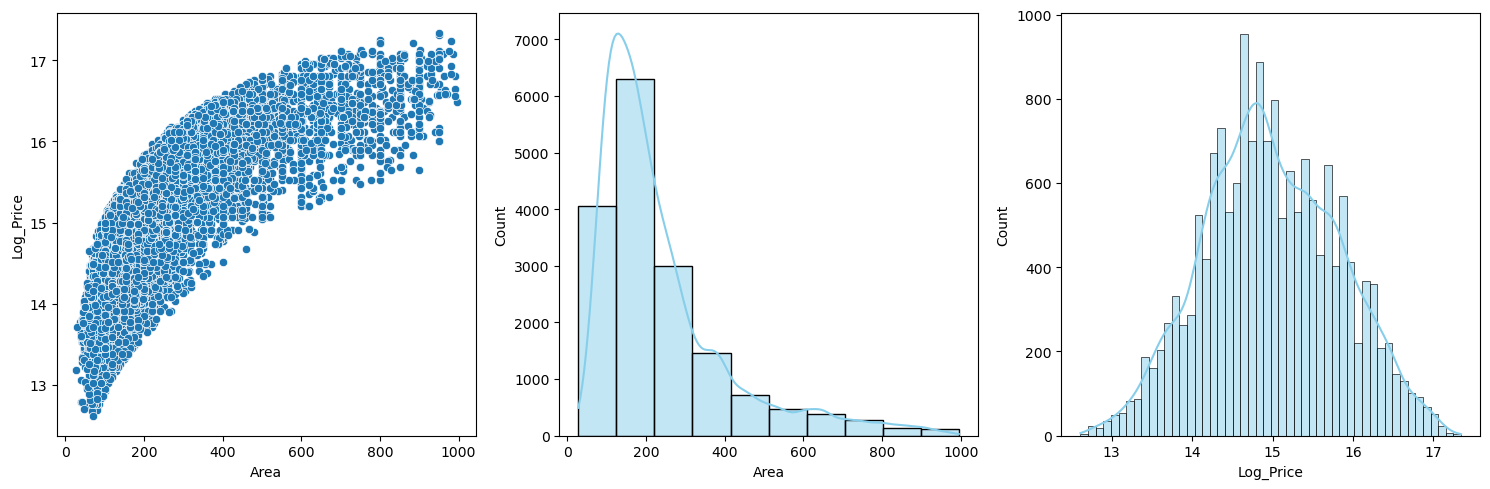

In [600]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='Area', y='Log_Price',ax=axs[0])
sns.histplot(df['Area'], kde=True, color='skyblue', bins=10,ax=axs[1])
sns.histplot(df['Log_Price'], kde=True, color='skyblue',ax=axs[2]) 
plt.tight_layout()
plt.show()

In [601]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Price_per_Area,Log_Price
0,0.0,2250000.0,3,3,165.0,0,1,0,65,13636.36,14.626441
1,0.0,1900000.0,3,3,230.0,0,10,0,42,8260.87,14.457364
2,0.0,1844900.0,4,4,222.0,0,1,2,43,8310.36,14.427936
3,0.0,1650000.0,2,2,144.0,0,1,2,60,11458.33,14.316286
4,0.0,1560000.0,3,3,200.0,0,0,2,43,7800.00,14.260196


In [602]:
df.drop(['Price','Price_per_Area'],axis=1,inplace=True)
df

,Type,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Log_Price
0,0.0,3,3,165.0,0,1,0,65,14.626441
1,0.0,3,3,230.0,0,10,0,42,14.457364
2,0.0,4,4,222.0,0,1,2,43,14.427936
3,0.0,2,2,144.0,0,1,2,60,14.316286
4,0.0,3,3,200.0,0,0,2,43,14.260196
...,...,...,...,...,...,...,...,...,...
16904,4.0,6,6,429.0,0,-1,1,44,15.967273
16905,4.0,4,4,450.0,1,-1,2,19,15.732433
16906,4.0,4,4,200.0,0,-1,2,49,15.671809
16907,4.0,3,3,200.0,0,-1,1,2,15.652243


In [603]:
x = df.drop(['Log_Price'],axis=1)
y = df['Log_Price']

In [604]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [605]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [606]:
lr = LinearRegression()

In [607]:
lr.fit(X_train,y_train)

LinearRegression()

In [608]:
lr.score(X_test,y_test)*100,lr.score(X_train,y_train)*100

(71.21386202003794, 70.82249056120516)

In [609]:
y_pred = lr.predict(x)

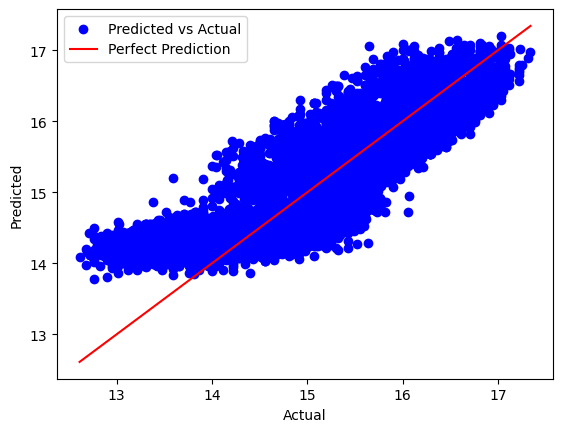

In [610]:
plt.scatter(y, y_pred, label="Predicted vs Actual", color='b')

plt.plot([min(y), max(y)], [min(y), max(y)], color='r', linestyle='-', label='Perfect Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [611]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
x_poly = poly_features.transform(x)

In [612]:
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
y_predpoly = poly.predict(x_poly)

In [613]:
poly.score(X_test_poly, y_test)*100,poly.score(X_train_poly, y_train)*100

(76.12201449381041, 75.58011120912857)

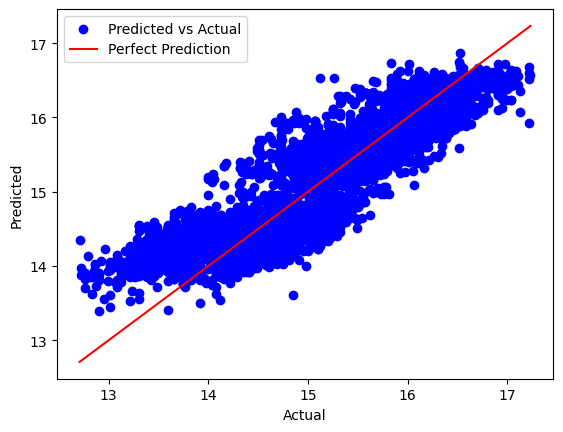

In [614]:
plt.scatter(y_test, poly.predict(X_test_poly), label="Predicted vs Actual", color='b')

# Plot a line of perfect predictions (y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='-', label='Perfect Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [615]:
df

,Type,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Log_Price
0,0.0,3,3,165.0,0,1,0,65,14.626441
1,0.0,3,3,230.0,0,10,0,42,14.457364
2,0.0,4,4,222.0,0,1,2,43,14.427936
3,0.0,2,2,144.0,0,1,2,60,14.316286
4,0.0,3,3,200.0,0,0,2,43,14.260196
...,...,...,...,...,...,...,...,...,...
16904,4.0,6,6,429.0,0,-1,1,44,15.967273
16905,4.0,4,4,450.0,1,-1,2,19,15.732433
16906,4.0,4,4,200.0,0,-1,2,49,15.671809
16907,4.0,3,3,200.0,0,-1,1,2,15.652243


In [616]:
df['City'].unique()

array([65, 42, 43, 60, 62, 15, 69,  2, 34, 46, 72, 10, 11, 37, 17,  5, 30,
       19, 32, 22, 45, 26,  0, 44, 53, 20, 50, 25, 23, 66, 24, 39, 28, 36,
       21, 40, 52, 33, 31, 57,  3, 59, 64, 29, 47, 13, 54, 68, 56,  6,  8,
       70, 61, 63, 35, 16, 55, 27, 38, 41, 71, 48,  9, 14,  1, 67, 49,  4,
       58, 51, 12, 18,  7])

In [617]:
tarek = lr.predict([[0.0,2,1,140,1,3,0,43]])
tarek

E:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.23679209])

In [618]:
import math

In [619]:
math.exp(tarek)

C:\Users\mazen\AppData\Local\Temp\ipykernel_15452\314153510.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  math.exp(tarek)


1523913.252401327

In [620]:
from sklearn.neighbors import KNeighborsRegressor

In [621]:
knn = KNeighborsRegressor()

In [622]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [623]:
knn.score(X_test,y_test)

0.8055429670358469

In [624]:
knn.score(X_train,y_train)

0.8645354018651873

In [625]:
y_pred_knn = knn.predict(X_test)

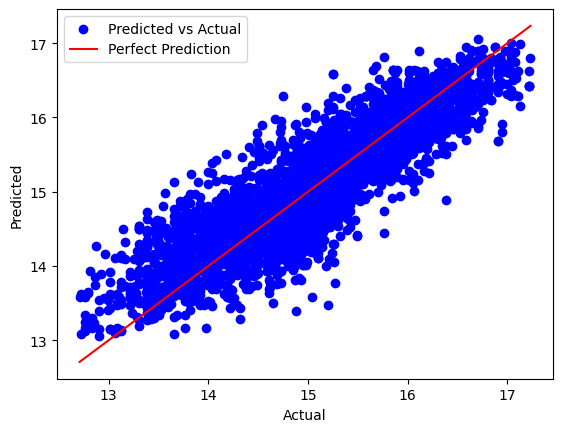

In [626]:
plt.scatter(y_test, knn.predict(X_test), label="Predicted vs Actual", color='b')

# Plot a line of perfect predictions (y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='-', label='Perfect Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [627]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [628]:
def get_cost(y, y_pred, model_name):
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    print(f'Mean Squared Error for {model_name} = {mse}')
    print(f'Mean Absolute Error for {model_name} = {mae}')
    print(f'R-squared for {model_name} = {r_squared}')

In [650]:
get_cost(y,y_pred,'Linear')

Mean Squared Error for Linear = 0.20294970573761895
Mean Absolute Error for Linear = 0.36280646436842406
R-squared for Linear = 0.7094837375092709


In [642]:
get_cost(y,y_predpoly,'Polynomial')

Mean Squared Error for Polynomial = 0.1694061206298791
Mean Absolute Error for Polynomial = 0.3334219093157052
R-squared for Polynomial = 0.7575003480316774


In [646]:
get_cost(y_test,y_pred_knn,'KNN')

Mean Squared Error for KNN = 0.13639029163266328
Mean Absolute Error for KNN = 0.2680564721195458
R-squared for KNN = 0.8055429670358469
